# Exploratory Data Analysis on the Titanic Dataset

## Introduction

The Titanic dataset is a classic dataset used in data science and machine learning for learning purposes. This project aims to perform an Exploratory Data Analysis (EDA) on the Titanic dataset to uncover patterns, relationships, and insights about the passengers and their survival rates.

## Dataset Overview

The dataset contains information about the passengers on the Titanic, including their demographics, ticket information, and whether they survived the disaster. The dataset is obtained from [this source](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv).

## Data Loading and Preliminary Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

In [3]:
# Display the first few rows
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Get summary info
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Describe the dataset for numerical problems
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Observations:

- The dataset contains 891 rows and 12 columns.
- Key features include 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'.
- There are some missing values in the 'Age', 'Cabin', and 'Embarked' columns.

## Data Cleaning

In [6]:
# Check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Fill missing values for age with median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [9]:
# Fill missing values for Embarked with the most frequent value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [11]:
# Drop the cabin column due to high number of missing values
titanic_data.drop(columns = ['Cabin'], inplace=True)

### Observations:

- Filled missing values in the 'Age' column with the median age to retain as much data as possible.
- Filled missing values in the 'Embarked' column with the mode (most frequent value) as it is a categorical feature.
- Dropped the 'Cabin' column due to a high number of missing values, making it impractical to impute.

## Exploratory Data Analysis

### Age and Fare Distributions

In [12]:
# Style of plots
sns.set_style('whitegrid')

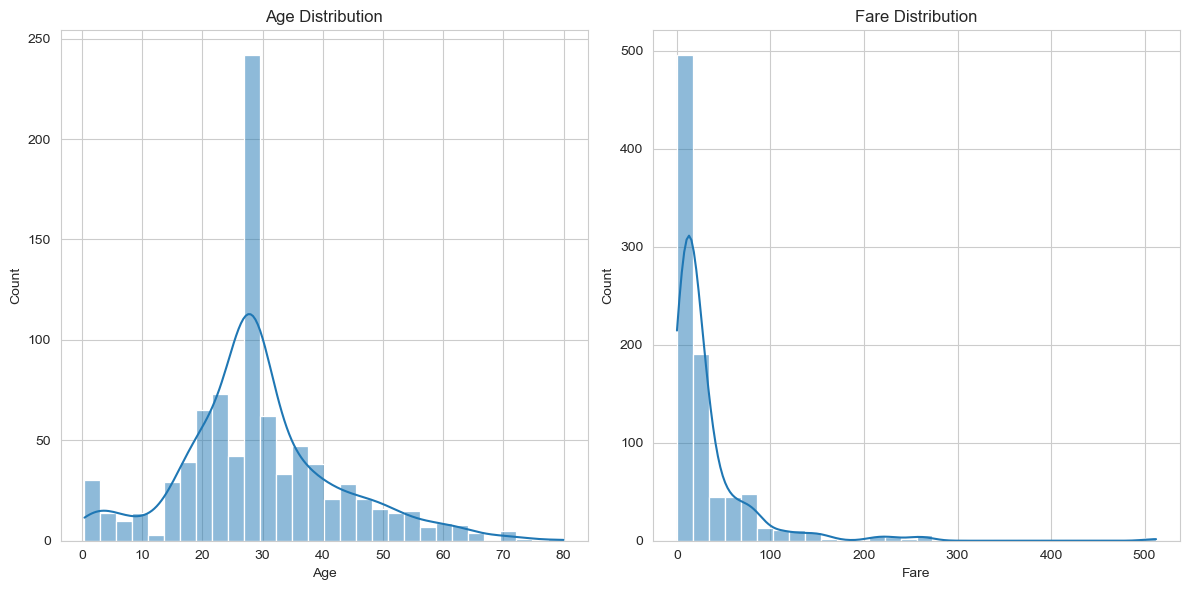

In [17]:
# Distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic_data['Age'], kde=True, bins=30)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(titanic_data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

### Observations:

- The age distribution shows that most passengers are between 20 and 40 years old.
- The fare distribution is right-skewed, indicating that most passengers paid lower fares, with a few outliers who paid significantly higher fares.

### Survival, Class, and Gender Distributions

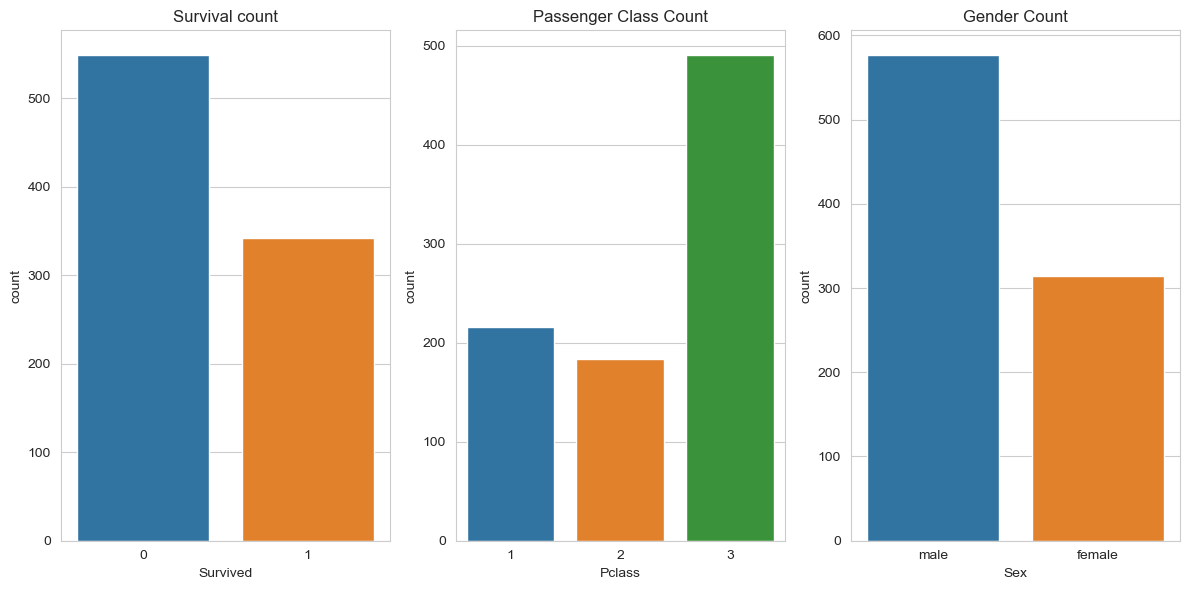

In [18]:
# count plots for categorical features

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival count')

plt.subplot(1, 3, 2)
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Passenger Class Count')

plt.subplot(1, 3, 3)
sns.countplot(x='Sex', data=titanic_data)
plt.title('Gender Count')

plt.tight_layout()
plt.show()

### Observations:

- There are more non-survivors than survivors.
- Most passengers traveled in the third class.
- There are more male passengers than female passengers.

### Relationships Between Features

#### Survival Rate by Gender

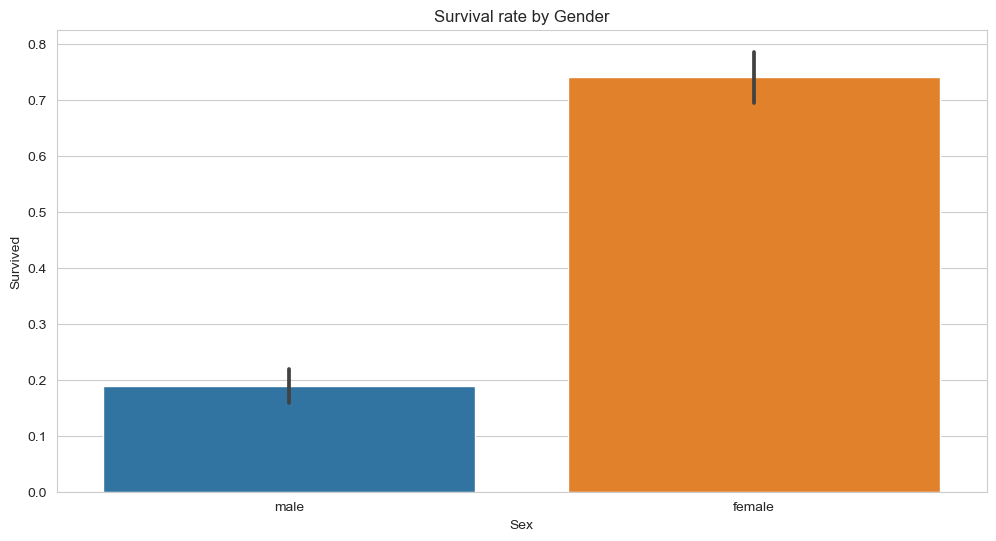

In [21]:
# Survival rate by gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival rate by Gender')
plt.show()

### Observations:

- The survival rate is higher for females than males.

#### Survival Rate by Class

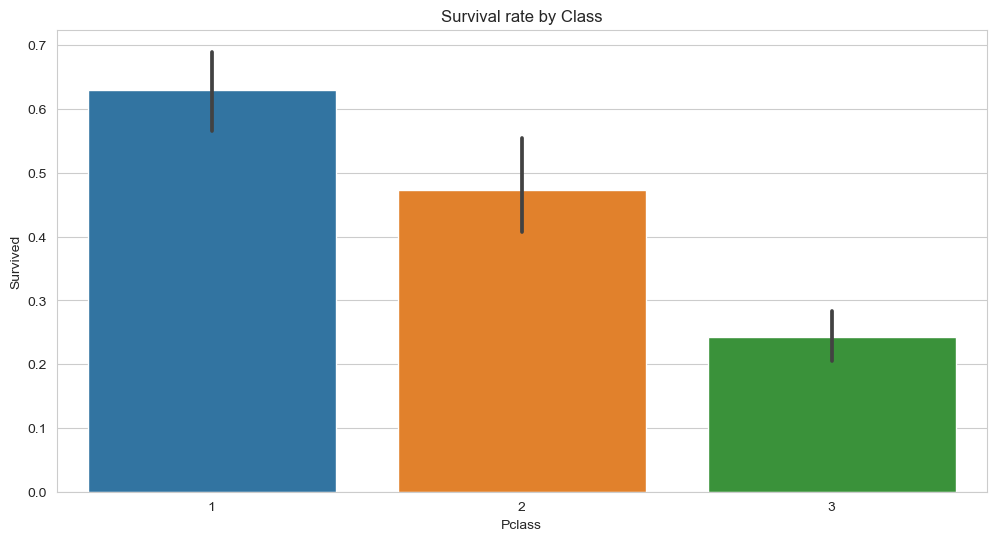

In [22]:
# Survival rate by class
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival rate by Class')
plt.show()

### Observations:

- Passengers in the first class had a higher survival rate compared to those in the second and third classes.

#### Age Distribution for Survivors vs. Non-Survivors

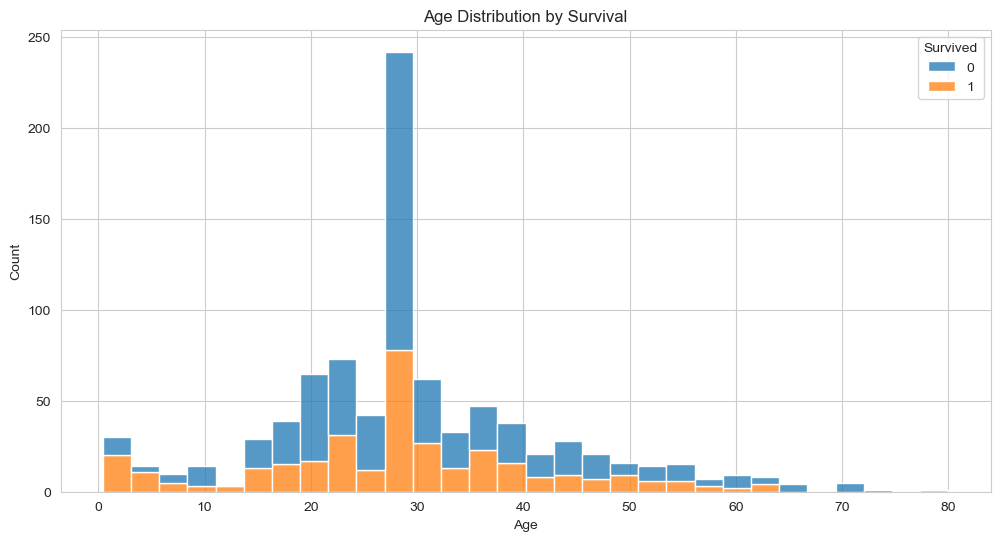

In [27]:
# Age distribution for survivors vs non-survivors
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

### Observations:

- The age distribution shows that children (age < 18) had a higher chance of survival.
- Most non-survivors were adults in the 20-40 age range.
- There are fewer older passengers (age > 60), and their survival rates seem lower compared to younger passengers.

## Conclusion

The exploratory data analysis on the Titanic dataset revealed several key insights:

- The majority of passengers were young adults.
- Most passengers traveled in the third class.
- There were more male passengers than female passengers.
- The survival rate was higher for females compared to males.
- First-class passengers had a higher survival rate compared to those in second and third classes.
- Children had a higher chance of survival compared to adults.

These insights can help guide further analysis and model-building efforts.